In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf


In [2]:
# Import our input dataset
df = pd.read_csv('TestData2021.csv')
df.head()

,id,season,week,season_type,start_date,start_time_tbd,completed,neutral_site,conference_game,attendance,...,away_line_scores[0],away_line_scores[1],away_line_scores[2],away_line_scores[3],away_post_win_prob,away_pregame_elo,away_postgame_elo,excitement_index,highlights,notes
0,401282714,2021,1,regular,2021-08-28T17:20:00.000Z,False,True,False,True,41064.0,...,0.0,9.0,7.0,6.0,0.594339,1503.0,1484.0,5.485981,NaN,NaN
1,401286187,2021,1,regular,2021-08-28T18:00:00.000Z,False,True,False,False,26043.0,...,0.0,0.0,0.0,0.0,0.001032,1223.0,1122.0,1.535556,NaN,NaN
2,401329133,2021,1,regular,2021-08-28T19:00:00.000Z,False,True,True,True,NaN,...,6.0,7.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
3,401309833,2021,1,regular,2021-08-28T19:30:00.000Z,False,True,False,False,32982.0,...,3.0,0.0,7.0,0.0,0.001076,1466.0,1378.0,1.391185,NaN,NaN
4,401328337,2021,1,regular,2021-08-28T22:00:00.000Z,False,True,False,False,NaN,...,0.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes

id                       int64
season                   int64
week                     int64
season_type             object
start_date              object
start_time_tbd            bool
completed                 bool
neutral_site              bool
conference_game           bool
attendance             float64
venue_id               float64
venue                   object
home_id                  int64
home_team               object
home_conference         object
home_division           object
home_points              int64
home_line_scores[0]    float64
home_line_scores[1]    float64
home_line_scores[2]    float64
home_line_scores[3]    float64
home_post_win_prob     float64
home_pregame_elo       float64
home_postgame_elo      float64
away_id                  int64
away_team               object
away_conference         object
away_division           object
away_points              int64
away_line_scores[0]    float64
away_line_scores[1]    float64
away_line_scores[2]    float64
away_lin

In [4]:
# Dropping redundant or nonvalue features
football_df = df.drop(["start_time_tbd","start_date","completed","venue_id","venue","home_id","home_post_win_prob",
                                "home_postgame_elo","away_id","away_post_win_prob",
                                "away_postgame_elo","excitement_index","highlights","notes",
                                "home_line_scores[0]","home_line_scores[1]","home_line_scores[2]","home_line_scores[3]",
                                "away_line_scores[0]","away_line_scores[1]","away_line_scores[2]","away_line_scores[3]"
                      ],axis=1)
football_df.head()

,id,season,week,season_type,neutral_site,conference_game,attendance,home_team,home_conference,home_division,home_points,home_pregame_elo,away_team,away_conference,away_division,away_points,away_pregame_elo
0,401282714,2021,1,regular,False,True,41064.0,Illinois,Big Ten,fbs,30,1392.0,Nebraska,Big Ten,fbs,22,1503.0
1,401286187,2021,1,regular,False,False,26043.0,Fresno State,Mountain West,fbs,45,1465.0,Connecticut,FBS Independents,fbs,0,1223.0
2,401329133,2021,1,regular,True,True,NaN,Central State,SIAC,ii,6,NaN,Kentucky State,SIAC,ii,20,NaN
3,401309833,2021,1,regular,False,False,32982.0,UCLA,Pac-12,fbs,44,1517.0,Hawai'i,Mountain West,fbs,10,1466.0
4,401328337,2021,1,regular,False,False,NaN,Indiana State,MVFC,fcs,26,NaN,Eastern Illinois,OVC,fcs,21,NaN


In [5]:
def home_win(game):
    if game['home_points'] > game['away_points']:
        return 1
    return 0

In [6]:
#Determine if the home team won
football_df["home_win"] = football_df.apply(lambda game: home_win(game), axis=1)
football_df.head()

,id,season,week,season_type,neutral_site,conference_game,attendance,home_team,home_conference,home_division,home_points,home_pregame_elo,away_team,away_conference,away_division,away_points,away_pregame_elo,home_win
0,401282714,2021,1,regular,False,True,41064.0,Illinois,Big Ten,fbs,30,1392.0,Nebraska,Big Ten,fbs,22,1503.0,1
1,401286187,2021,1,regular,False,False,26043.0,Fresno State,Mountain West,fbs,45,1465.0,Connecticut,FBS Independents,fbs,0,1223.0,1
2,401329133,2021,1,regular,True,True,NaN,Central State,SIAC,ii,6,NaN,Kentucky State,SIAC,ii,20,NaN,0
3,401309833,2021,1,regular,False,False,32982.0,UCLA,Pac-12,fbs,44,1517.0,Hawai'i,Mountain West,fbs,10,1466.0,1
4,401328337,2021,1,regular,False,False,NaN,Indiana State,MVFC,fcs,26,NaN,Eastern Illinois,OVC,fcs,21,NaN,1


In [7]:
football_df.isna().sum()

id                     0
season                 0
week                   0
season_type            0
neutral_site           0
conference_game        0
attendance          1562
home_team              0
home_conference        5
home_division          5
home_points            0
home_pregame_elo    1665
away_team              0
away_conference       36
away_division         36
away_points            0
away_pregame_elo    1668
home_win               0
dtype: int64

In [8]:
Conf_football = football_df[football_df["home_division"].isin(["fbs"])]
Conf_football = football_df[football_df["away_division"].isin(["fbs"])]

Conf_football.head()

,id,season,week,season_type,neutral_site,conference_game,attendance,home_team,home_conference,home_division,home_points,home_pregame_elo,away_team,away_conference,away_division,away_points,away_pregame_elo,home_win
0,401282714,2021,1,regular,False,True,41064.0,Illinois,Big Ten,fbs,30,1392.0,Nebraska,Big Ten,fbs,22,1503.0,1
1,401286187,2021,1,regular,False,False,26043.0,Fresno State,Mountain West,fbs,45,1465.0,Connecticut,FBS Independents,fbs,0,1223.0,1
3,401309833,2021,1,regular,False,False,32982.0,UCLA,Pac-12,fbs,44,1517.0,Hawai'i,Mountain West,fbs,10,1466.0,1
6,401282049,2021,1,regular,False,False,19034.0,New Mexico State,FBS Independents,fbs,3,1261.0,UTEP,Conference USA,fbs,30,1222.0,0
8,401282050,2021,1,regular,True,False,9122.0,Jacksonville State,AWC,fcs,0,NaN,UAB,Conference USA,fbs,31,NaN,0


In [9]:
Conf_football.isna().sum()

id                  0
season              0
week                0
season_type         0
neutral_site        0
conference_game     0
attendance          3
home_team           0
home_conference     0
home_division       0
home_points         0
home_pregame_elo    1
away_team           0
away_conference     0
away_division       0
away_points         0
away_pregame_elo    1
home_win            0
dtype: int64

In [10]:
len(Conf_football)

733

In [11]:
Conf_football.home_conference.value_counts()

Big Ten              89
SEC                  87
ACC                  84
Pac-12               72
Conference USA       70
Mountain West        64
American Athletic    59
Big 12               59
Mid-American         59
Sun Belt             54
FBS Independents     35
AWC                   1
Name: home_conference, dtype: int64

In [12]:
Clean_football = Conf_football.drop(["id","season","home_division","away_division","home_team","away_team","home_points","away_points"],axis=1).dropna()

Clean_football.head()

,week,season_type,neutral_site,conference_game,attendance,home_conference,home_pregame_elo,away_conference,away_pregame_elo,home_win
0,1,regular,False,True,41064.0,Big Ten,1392.0,Big Ten,1503.0,1
1,1,regular,False,False,26043.0,Mountain West,1465.0,FBS Independents,1223.0,1
3,1,regular,False,False,32982.0,Pac-12,1517.0,Mountain West,1466.0,1
6,1,regular,False,False,19034.0,FBS Independents,1261.0,Conference USA,1222.0,0
21,1,regular,False,False,43928.0,American Athletic,1648.0,Mountain West,1602.0,1


In [13]:
# Generate our categorical variable lists
football_cat = Clean_football.dtypes[Clean_football.dtypes == "object"].index.tolist()

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(Clean_football[football_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(football_cat)
encode_df.head()

,season_type_regular,home_conference_ACC,home_conference_American Athletic,home_conference_Big 12,home_conference_Big Ten,home_conference_Conference USA,home_conference_FBS Independents,home_conference_Mid-American,home_conference_Mountain West,home_conference_Pac-12,...,away_conference_American Athletic,away_conference_Big 12,away_conference_Big Ten,away_conference_Conference USA,away_conference_FBS Independents,away_conference_Mid-American,away_conference_Mountain West,away_conference_Pac-12,away_conference_SEC,away_conference_Sun Belt
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
# Merge one-hot encoded features and drop the originals
merged_df = Clean_football.merge(encode_df,left_index=True, right_index=True)
merged_df = merged_df.drop(football_cat,axis=1)
merged_df.head()

,week,neutral_site,conference_game,attendance,home_pregame_elo,away_pregame_elo,home_win,season_type_regular,home_conference_ACC,home_conference_American Athletic,...,away_conference_American Athletic,away_conference_Big 12,away_conference_Big Ten,away_conference_Conference USA,away_conference_FBS Independents,away_conference_Mid-American,away_conference_Mountain West,away_conference_Pac-12,away_conference_SEC,away_conference_Sun Belt
0,1,False,True,41064.0,1392.0,1503.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,False,False,26043.0,1465.0,1223.0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,False,False,32982.0,1517.0,1466.0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,False,False,19034.0,1261.0,1222.0,0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,1,False,False,43928.0,1648.0,1602.0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
#Convert boolean values to int
merged_df["neutral_site"]=merged_df["neutral_site"].astype(int)
merged_df["conference_game"]=merged_df["conference_game"].astype(int)
merged_df.head()

,week,neutral_site,conference_game,attendance,home_pregame_elo,away_pregame_elo,home_win,season_type_regular,home_conference_ACC,home_conference_American Athletic,...,away_conference_American Athletic,away_conference_Big 12,away_conference_Big Ten,away_conference_Conference USA,away_conference_FBS Independents,away_conference_Mid-American,away_conference_Mountain West,away_conference_Pac-12,away_conference_SEC,away_conference_Sun Belt
0,1,0,1,41064.0,1392.0,1503.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,26043.0,1465.0,1223.0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,32982.0,1517.0,1466.0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,0,0,19034.0,1261.0,1222.0,0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,1,0,0,43928.0,1648.0,1602.0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
# Split our preprocessed data into our features and target arrays
y = merged_df.home_win.values
X = merged_df.drop(columns=["home_win"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 90

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 90)                2700      
                                                                 
 dense_6 (Dense)             (None, 1)                 91        
                                                                 
Total params: 2,791
Trainable params: 2,791
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
5/5 [==============================] - 1s 2ms/step - loss: 0.7645 - accuracy: 0.5075
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.7175 - accuracy: 0.5672
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.6119
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6512 - accuracy: 0.6716
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6269 - accuracy: 0.6567
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.6940
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5844 - accuracy: 0.7090
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7164
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5539 - accuracy: 0.7388
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5404 - accuracy: 0.7388
Epoch 11/100
5/5 [===========

5/5 [==============================] - 0s 2ms/step - loss: 0.2378 - accuracy: 0.9104
Epoch 85/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2385 - accuracy: 0.9104
Epoch 86/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.9254
Epoch 87/100
5/5 [==============================] - 0s 1ms/step - loss: 0.2336 - accuracy: 0.9254
Epoch 88/100
5/5 [==============================] - 0s 1ms/step - loss: 0.2313 - accuracy: 0.9328
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2287 - accuracy: 0.9328
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9328
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.9254
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2235 - accuracy: 0.9254
Epoch 93/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2215 - accuracy: 0.9254
Epoch 94/100
5/5 [===============

<AxesSubplot:>

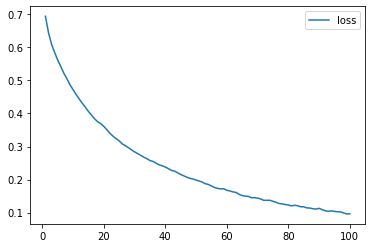

In [24]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

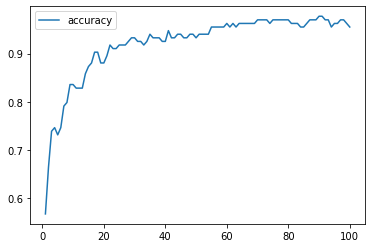

In [25]:
# Plot the accuracy
history_df.plot(y="accuracy")